In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [69]:
from matplotlib import rcParams
rcParams['font.size'] = 14

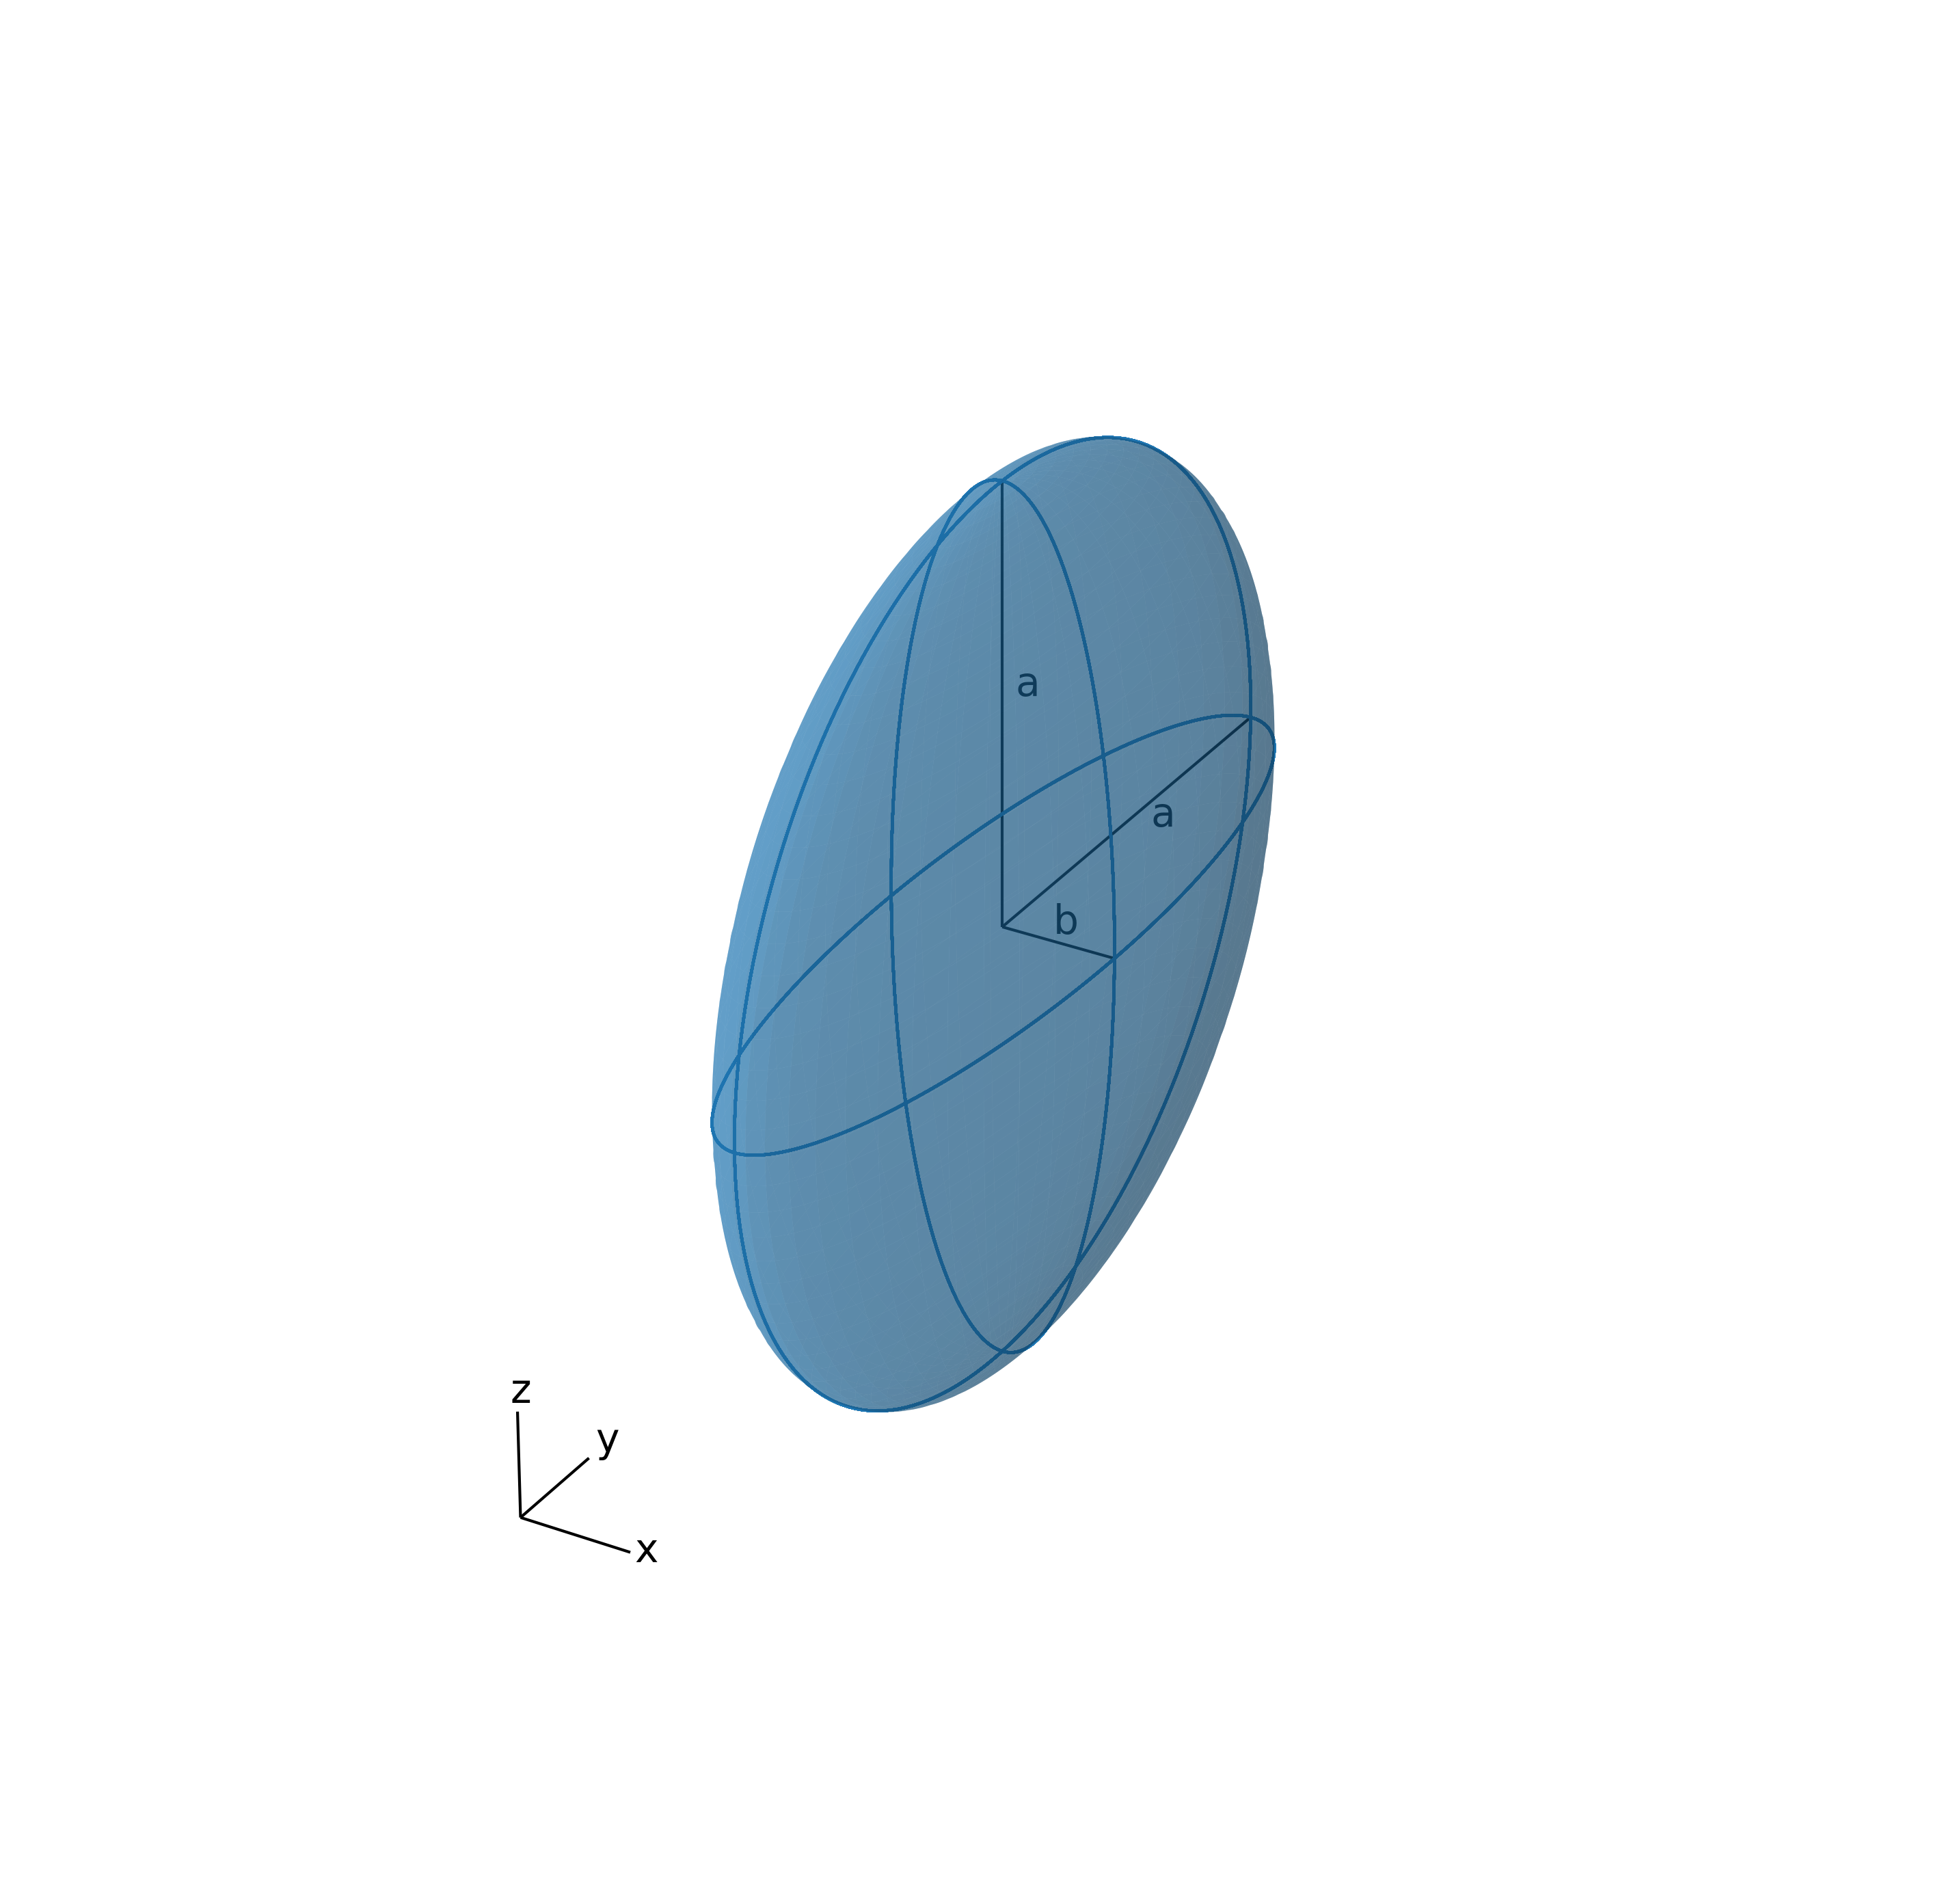

In [93]:
fig = plt.figure(figsize=(12, 12), dpi=300)  # Square figure
ax = fig.add_subplot(111, projection='3d')

# coefs = (2, 0.5, 2)  # Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
# Radii corresponding to the coefficients:
rx, ry, rz = 0.5, 2, 2

# Set of all spherical angles:
n = 200
u = np.linspace(0, 2 * np.pi, n)
v = np.linspace(0, np.pi, n)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
x = rx * np.outer(np.cos(u), np.sin(v))
y = ry * np.outer(np.sin(u), np.sin(v))
z = rz * np.outer(np.ones_like(u), np.cos(v))

# Plot:
ax.plot_surface(x, y, z,  rstride=4, cstride=4, alpha=0.45)

# # plot the semi-axes
ax.plot_wireframe(np.atleast_2d(np.r_[0., rx]), np.atleast_2d(np.r_[0., 0.]), np.atleast_2d(np.r_[0., 0.]), color='k', lw=1)
ax.plot_wireframe(np.atleast_2d(np.r_[0., 0.]), np.atleast_2d(np.r_[0., ry]), np.atleast_2d(np.r_[0., 0.]), color='k', lw=1)
ax.plot_wireframe(np.atleast_2d(np.r_[0., 0.]), np.atleast_2d(np.r_[0., 0.]), np.atleast_2d(np.r_[0., rz]), color='k', lw=1)

# annotate
ax.text(0.2, 0.05, 0., 'b')
ax.text(0.1, 1., 0., 'a')
ax.text(0., 0.1, 1, 'a')
# ax.text(0.3, 0., 0., 'a')


# plot bounding circles
t = np.linspace(0., 2*np.pi, n)
ax.plot_wireframe(np.atleast_2d(rx*np.cos(t)), np.atleast_2d(ry*np.sin(t)), np.zeros((n,1)),  rstride=4, cstride=4, color='C0', lw=1)
ax.plot_wireframe(np.zeros((n,1)), np.atleast_2d(ry*np.cos(t)), np.atleast_2d(rz*np.sin(t)),  rstride=4, cstride=4, color='C0', lw=1)
ax.plot_wireframe(np.atleast_2d(rx*np.sin(t)), np.zeros((n,1)), np.atleast_2d(rz*np.cos(t)),  rstride=4, cstride=4, color='C0', lw=1)

# Adjustment of the axes, so that they all have the same span:
max_radius = max(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

    
# plot a coordinate system
# # plot the semi-axes
x0 = -1
y0 = -2
z0 = -2
dx = 0.5
ax.plot_wireframe(np.atleast_2d(x0+np.r_[0., dx]), np.atleast_2d(y0+np.r_[0., 0.]), np.atleast_2d(z0+np.r_[0., 0.]), color='k', lw=1)
ax.plot_wireframe(np.atleast_2d(x0+np.r_[0., 0.]), np.atleast_2d(y0+np.r_[0., dx]), np.atleast_2d(z0+np.r_[0., 0.]), color='k', lw=1)
ax.plot_wireframe(np.atleast_2d(x0+np.r_[0., 0.]), np.atleast_2d(y0+np.r_[0., 0.]), np.atleast_2d(z0+np.r_[0., dx]), color='k', lw=1)

ax.text(x0+dx+0.05, y0-0.05, z0, "x")
ax.text(x0, y0+dx+0.05, z0, "y")
ax.text(x0, y0-0.05, z0+dx+0.07, "z")


# indz = np.abs(z) == np.min(np.abs(z))
# ax.plot_wireframe(x[indz], y[indz], z[indz], rstride=4, cstride=4, color='k', alpha=0.2)
# ax.plot_wireframe(x, y, z,  rstride=4, cstride=4, color='k', alpha=0.2)
ax.axis('off')
plt.show()

fig.savefig("ellipsoid_geometry", bbox_inches="tight")

In [46]:
z.shape

(200, 200)

In [47]:
x.shape

(200, 200)